In [73]:
import pandas as pd

train_df = pd.read_csv("./train.csv")
train_df.set_index("PassengerId", inplace=True)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
train_df.shape

(891, 11)

In [19]:
train_df["Survived"].value_counts()  # 549 survived, 342 did not in this set, 2 values
train_df["Pclass"].value_counts()    # '3rd' class 491, '2nd' 184, '1st' 216
train_df["Sex"].value_counts()       # 577 'male', 314 'female'
train_df["SibSp"].value_counts()     # 608 alone, 209 w/spouse, 78 other; range 0..5
train_df["Parch"].value_counts()     # 678 alone, 118:1, 80:2, 15 total for 3-6
train_df["Ticket"].value_counts()    # seems useless...drop?
train_df["Fare"].value_counts()      # also seems useless, but maybe correlation to # SibSp, Parch...drop?
train_df["Cabin"].value_counts()     # Since 687/891 of NaN...drop? But is somewhat predictive
train_df["Embarked"].value_counts()  # S=644, C=168, Q=77

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
train_df["Cabin"].isna().sum()     # also seems useless, since lots of NaN...drop?

687

# Next, graph correlation between survival & all variables

In [68]:
train_df.dtypes

Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
CabinIsNa       bool
dtype: object

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [75]:
sns.set(color_codes=True)

#sns.lmplot('Survived', 'Pclass', data=train_df, fit_reg=False)
#sns.distplot(train_df['Pclass'], kde=False, rug=True);

#vals = plt.hist(train_df['Pclass'], alpha=.3)
#sns.rugplot(train_df['Pclass']);

#sns.pairplot(train_df.select_dtypes(exclude=[object]).dropna());
#train_df.select_dtypes(exclude=[object]).dropna().shape
#train_df.select_dtypes(exclude=[object])
#sns.lmplot('Survived', 'Pclass', data=train_df, fit_reg=False)

(714, 7)

In [48]:
train_df['Pclass'].value_counts

<bound method IndexOpsMixin.value_counts of PassengerId
1      3
2      1
3      3
4      1
5      3
6      3
7      1
8      3
9      3
10     2
11     3
12     1
13     3
14     3
15     3
16     2
17     3
18     2
19     3
20     3
21     2
22     2
23     3
24     1
25     3
26     3
27     3
28     1
29     3
30     3
      ..
862    2
863    1
864    3
865    2
866    2
867    2
868    1
869    3
870    3
871    3
872    1
873    1
874    3
875    2
876    3
877    3
878    3
879    3
880    1
881    2
882    3
883    3
884    2
885    3
886    3
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64>

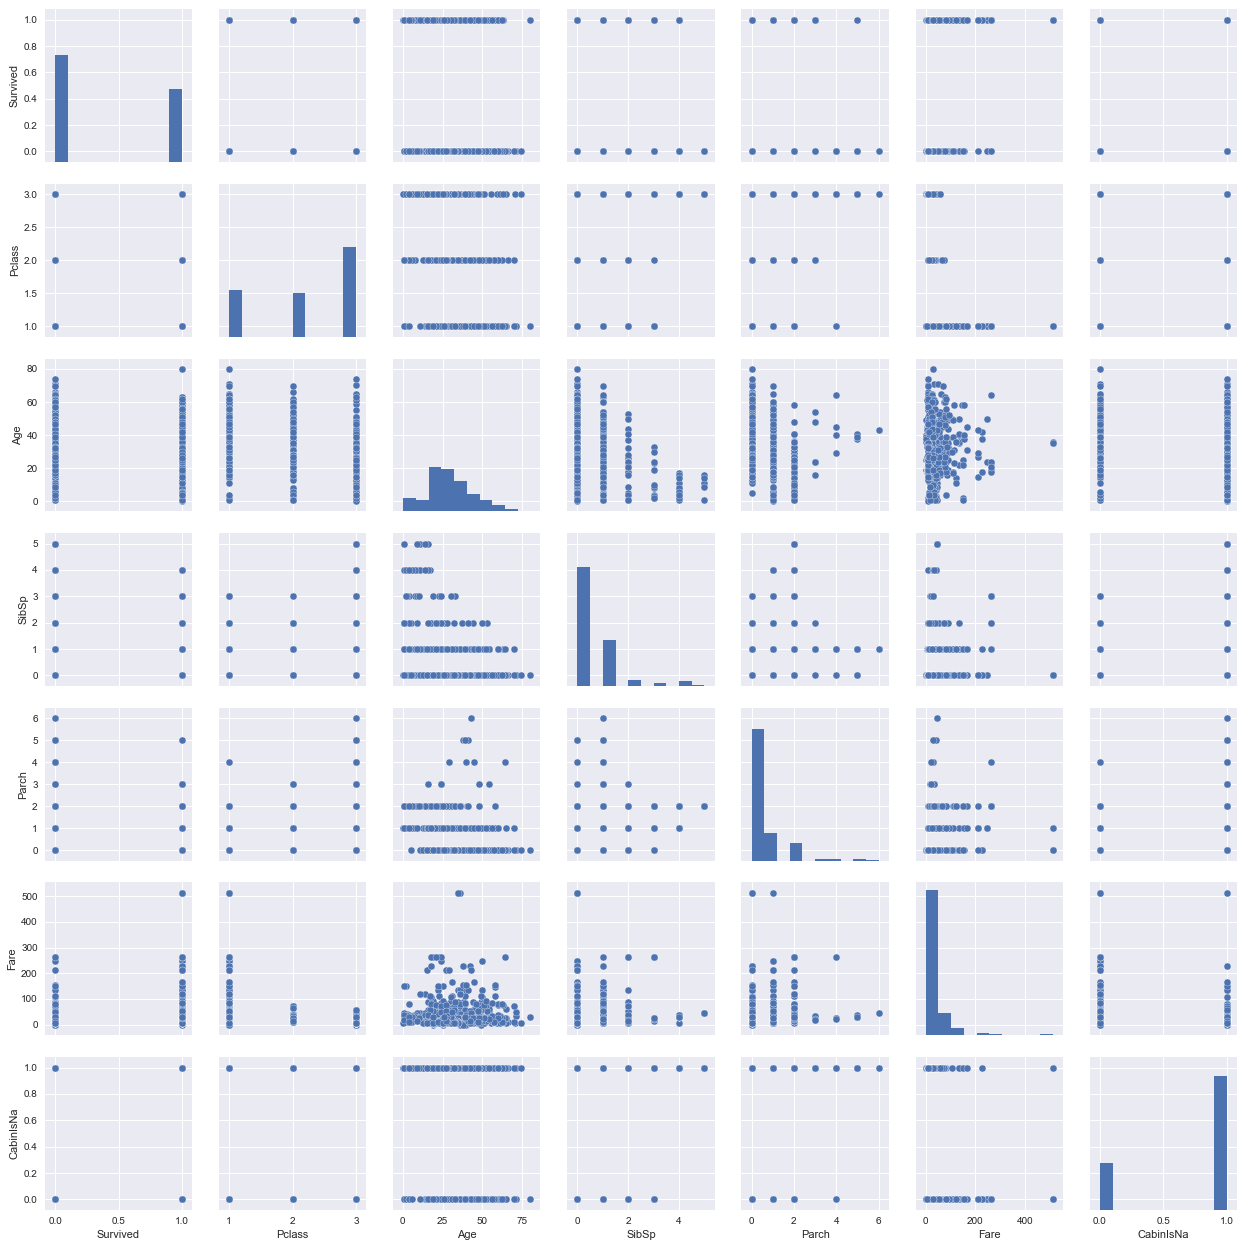

In [76]:
# dropping NA's reduces recordset significantly -- not really valid
sns.pairplot(train_df.select_dtypes(exclude=[object]).dropna());

In [49]:
train_df['CabinIsNa'] = train_df['Cabin'].isna()

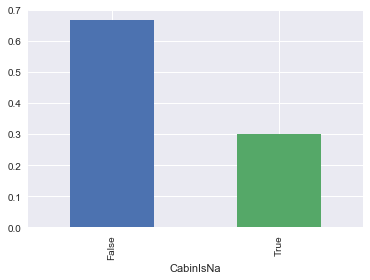

In [79]:
train_df.groupby('CabinIsNa')['Survived'].mean().plot(kind='bar')
#train_df['CabinIsNa']

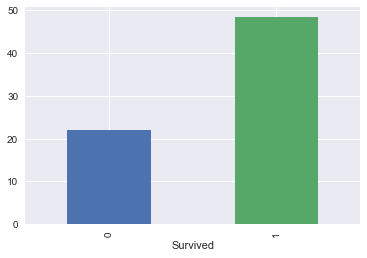

In [83]:
train_df.groupby('Survived')['Fare'].mean().plot(kind='bar')

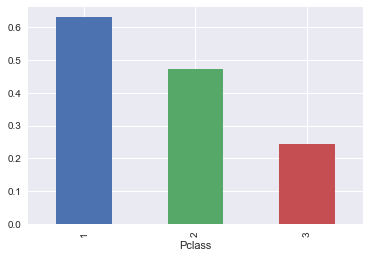

In [86]:
train_df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

In [24]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], normalize=0)  # conclusion: class is somewhat predictive!

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [5]:
pd.crosstab(train_df['Cabin'].isna(), train_df['Survived'], normalize=0)  # conclusion: non-NaN cabin seems predictive for survival and NaN sees predictive for not surviving

Survived,0,1
Cabin,,
False,0.333333,0.666667
True,0.700146,0.299854


In [7]:
pd.crosstab(train_df['Sex'], train_df['Survived'], normalize=0)  # conclusion: same with gender

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dbf2898>,
      dtype=object)

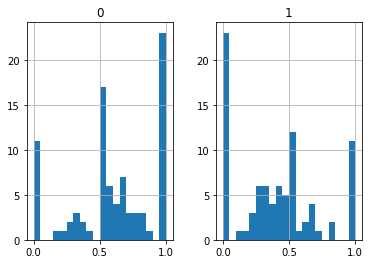

In [22]:
pd.crosstab(train_df['Age'], train_df['Survived'], normalize=0).hist(bins=20)  # conclusion: try bucketing


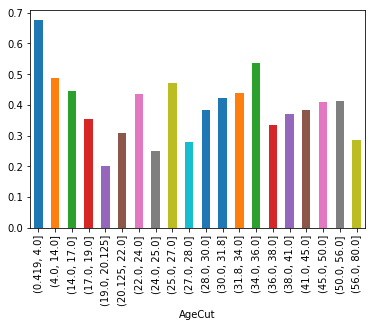

In [29]:
train_df['AgeCut'] = pd.qcut(train_df['Age'], 20) 
train_df.groupby('AgeCut')['Survived'].mean().sort_index().plot(kind='bar')

In [16]:
pd.qcut(train_df.groupby('Age')['Survived'].mean(), 3, labels=["young", "middle-aged", "old"])  # huh?

Age
0.42             old
0.67             old
0.75             old
0.83             old
0.92             old
1.00             old
2.00     middle-aged
3.00             old
4.00             old
5.00             old
6.00             old
7.00     middle-aged
8.00     middle-aged
9.00           young
10.00          young
11.00          young
12.00            old
13.00            old
14.00    middle-aged
14.50          young
15.00            old
16.00    middle-aged
17.00    middle-aged
18.00    middle-aged
19.00    middle-aged
20.00          young
20.50          young
21.00          young
22.00    middle-aged
23.00    middle-aged
            ...     
44.00    middle-aged
45.00    middle-aged
45.50          young
46.00          young
47.00          young
48.00            old
49.00            old
50.00    middle-aged
51.00    middle-aged
52.00    middle-aged
53.00            old
54.00    middle-aged
55.00    middle-aged
55.50          young
56.00    middle-aged
57.00          young
58.00    

In [20]:
pd.qcut(train_df['Age'], 3, labels=["young", "middle-aged", "old"]) #.plot(kind='bar')

PassengerId
1            young
2              old
3      middle-aged
4              old
5              old
6              NaN
7              old
8            young
9      middle-aged
10           young
11           young
12             old
13           young
14             old
15           young
16             old
17           young
18             NaN
19     middle-aged
20             NaN
21             old
22     middle-aged
23           young
24     middle-aged
25           young
26             old
27             NaN
28           young
29             NaN
30             NaN
          ...     
862          young
863            old
864            NaN
865    middle-aged
866            old
867    middle-aged
868    middle-aged
869            NaN
870          young
871    middle-aged
872            old
873    middle-aged
874            old
875    middle-aged
876          young
877          young
878          young
879            NaN
880            old
881    middle-aged
882    middle-aged


In [57]:
train_df['Survived'].mean()

0.3838383838383838

In [62]:
train_df.groupby('Survived')['Fare'].mean()
#train_df['Fare']

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [66]:
#train_df.groupby("Survived")["Ticket"]  # seems useless, but maybe extract the number part?

S     644
C     168
Q      77
NA      2
Name: EmbarkedFixed, dtype: int64

In [66]:
train_df['SexCtg'] = train_df['Sex'].fillna('NA')
train_df['SexCtg'].isna().any()
train_df['SexCtg'].value_counts()

male      577
female    314
Name: SexCtg, dtype: int64

In [129]:
import pandas as pd

train_df = pd.read_csv("./train.csv")
train_df.set_index("PassengerId", inplace=True)
#train_df

In [130]:
test_df = pd.read_csv("./test.csv")
test_df.set_index("PassengerId", inplace=True)
#test_df

In [131]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
str_names = train_df.select_dtypes(include=[object]).columns
for var in str_names:
    new_classes = set(test_df[var].values) - set(train_df[var].values) 
    test_df.loc[test_df[var].isin(new_classes), var] = np.nan
    train_df[var] = train_df[var].fillna('NA')
    test_df[var] = test_df[var].fillna('NA')
    
    train_df[var] = enc.fit_transform(train_df[var])
    #classes = enc.classes_
    
    #classes = np.concatenate((classes, np.array(new_classes)))
    #enc.classes_ = classes
    
    test_df[var] = enc.transform(test_df[var])
    #train_df[new_name].isna().any()
    #train_df[name].value_counts()
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,146,3
2,1,1,0,38.0,1,0,71.2833,81,0
3,1,3,0,26.0,0,0,7.9250,146,3
4,1,1,0,35.0,1,0,53.1000,55,3
5,0,3,1,35.0,0,0,8.0500,146,3
6,0,3,1,NaN,0,0,8.4583,146,2
7,0,1,1,54.0,0,0,51.8625,129,3
8,0,3,1,2.0,3,1,21.0750,146,3
9,1,3,0,27.0,0,2,11.1333,146,3


In [132]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,146,2
893,3,0,47.0,1,0,7.0000,146,3
894,2,1,62.0,0,0,9.6875,146,2
895,3,1,27.0,0,0,8.6625,146,3
896,3,0,22.0,1,1,12.2875,146,3
897,3,1,14.0,0,0,9.2250,146,3
898,3,0,30.0,0,0,7.6292,146,2
899,2,1,26.0,1,1,29.0000,146,3
900,3,0,18.0,0,0,7.2292,146,0


In [107]:
new_classes

{'A11',
 'A18',
 'A21',
 'A29',
 'A34',
 'A9',
 'B10',
 'B11',
 'B24',
 'B26',
 'B36',
 'B41',
 'B45',
 'B51 B53 B55',
 'B52 B54 B56',
 'B57 B59 B63 B66',
 'B58 B60',
 'B61',
 'B69',
 'B71',
 'B78',
 'C101',
 'C105',
 'C106',
 'C116',
 'C130',
 'C132',
 'C22 C26',
 'C23 C25 C27',
 'C28',
 'C31',
 'C32',
 'C39',
 'C46',
 'C51',
 'C53',
 'C54',
 'C55 C57',
 'C6',
 'C62 C64',
 'C7',
 'C78',
 'C80',
 'C85',
 'C86',
 'C89',
 'C97',
 'D',
 'D10 D12',
 'D15',
 'D19',
 'D21',
 'D22',
 'D28',
 'D30',
 'D34',
 'D37',
 'D38',
 'D40',
 'D43',
 'E31',
 'E34',
 'E39 E41',
 'E45',
 'E46',
 'E50',
 'E52',
 'E60',
 'F',
 'F E46',
 'F E57',
 'F G63',
 'F2',
 'F33',
 'F4',
 'G6',
 'NA'}

In [133]:
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(train_df.mean(), inplace=True)

In [134]:
Y_train = train_df['Survived']
X_train = train_df.drop(['Survived'], axis=1)
X_train


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,1,22.000000,1,0,7.2500,146,3
2,1,0,38.000000,1,0,71.2833,81,0
3,3,0,26.000000,0,0,7.9250,146,3
4,1,0,35.000000,1,0,53.1000,55,3
5,3,1,35.000000,0,0,8.0500,146,3
6,3,1,29.699118,0,0,8.4583,146,2
7,1,1,54.000000,0,0,51.8625,129,3
8,3,1,2.000000,3,1,21.0750,146,3
9,3,0,27.000000,0,2,11.1333,146,3


In [136]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV()
lr.fit(X_train, Y_train)
pred = lr.predict(test_df)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [140]:
res = pd.DataFrame(pred, index=test_df.index, columns=['Survived'])
res.to_csv('./titanic_submission.csv')